import important libraries

In [47]:
import dvc.api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import plotly.graph_objects as go
import sys, os

Import required Modules

In [30]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file import Myfile
from preprocessing import Preprocess
#from loader import LoadData

##### Initialize class

In [31]:
file = Myfile()
preprocess = Preprocess()

Loading the Data

In [32]:
date = ['Trip Start Time', 'Trip End Time'] # the date column name
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

In [88]:
nbdf = file.read_csv('../data/nb.csv')
#nbdf = pd.read_csv('../data/nb.csv', na_values=missing_values)

--> file read as csv


In [34]:
nbdf.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


Data information

In [7]:
nbdf.shape

(536020, 5)

In [8]:
nbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [9]:
nbdf.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time'],
      dtype='object')

#### Pre-Processing

##### Handling datatypes
let convert the Trip Start Time and Trip End Time to date time datatype and the Trip Origin and trip Destination to numeric values.

In [11]:
nbdf = preprocess.convert_to_datetime(nbdf, 'Trip Start Time')
nbdf = preprocess.convert_to_datetime(nbdf, 'Trip End Time')

In [12]:
#converting object type to float
#link: https://stackoverflow.com/questions/43987237/convert-multiple-datatype-to-float 
nbdf[['Trip Origin','Trip Destination']] = nbdf[['Trip Origin','Trip Destination']].apply(pd.to_numeric, errors='coerce') 

In [13]:
nbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       0 non-null       float64       
 2   Trip Destination  0 non-null       float64       
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 20.4 MB


##### Null Percentage

In [89]:
#nullpercentage
print(f" Null Percentage : {preprocess.get_missing_data_percentage(nbdf)} %")

 Null Percentage :                   Total    %
Trip Start Time    1651  0.3
Trip End Time         1  0.0
Trip ID               0  0.0
Trip Origin           0  0.0
Trip Destination      0  0.0 %


##### Handling Missing values

from the above null percentage we have got the columns of Trip Start and end Time and . so let us handle it.

In [38]:
# droping the null records 
nbdf.dropna(inplace = True)

In [39]:
nbdf.isnull().sum()

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64

In [60]:
nbdf['Trip ID'].min(), nbdf['Trip ID'].max()

(391996, 1637709)

In [61]:
nbdf['Trip ID'].value_counts().unique

<bound method Series.unique of 391996     1
1180070    1
1180061    1
1180060    1
1180059    1
          ..
789757     1
789755     1
789751     1
789750     1
1637709    1
Name: Trip ID, Length: 536020, dtype: int64>

#### Dealing with the second datasets

In [18]:
driv_loc_df = file.read_csv('../data/driver_locations.csv')

--> file read as csv


In [19]:
driv_loc_df.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [20]:
driv_loc_df.shape

(1557740, 8)

In [21]:
driv_loc_df.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at'],
      dtype='object')

In [22]:
driv_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


#### Pre-Processing

In [23]:
#nullpercentage
print(f" Null Percentage : {preprocess.get_missing_data_percentage(driv_loc_df)} %")

 Null Percentage :                  Total      %
created_at     1557740  100.0
updated_at     1557740  100.0
id                   0    0.0
order_id             0    0.0
driver_id            0    0.0
driver_action        0    0.0
lat                  0    0.0
lng                  0    0.0 %


In [24]:
# dropping nul values 
driv_loc_df.drop(['created_at', 'updated_at'], inplace=True, axis=1)

In [25]:
#checking nullpercentage
print(f" Null Percentage : {preprocess.get_missing_data_percentage(driv_loc_df)} %")

 Null Percentage :                Total    %
id                 0  0.0
order_id           0  0.0
driver_id          0  0.0
driver_action      0  0.0
lat                0  0.0
lng                0  0.0 %


In [26]:
driv_loc_df.head(2)

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445


In [73]:
driv_loc_df.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

In [74]:
driv_loc_df.order_id.min(), driv_loc_df.order_id.max()

(392001, 517948)

In [75]:
driv_loc_df.driver_id.min(), driv_loc_df.driver_id.max()

(121981, 247877)

In [76]:
driv_loc_df.driver_id.value_counts().keys().unique()

Int64Index([245538, 243020, 242971, 243676, 243932, 171165, 243581, 244121,
            244031, 243826,
            ...
            247709, 246615, 245756, 247508, 247794, 245840, 247182, 245907,
            246082, 246602],
           dtype='int64', length=1213)

##### Feature engineertring

Distance and speed features are going to be engineered.


###### separate  latitide and longitide from the from each coordinate point

In [42]:
#trip origion 
nbdf['Trip_Origin_lat'] = nbdf['Trip Origin'].apply(lambda x: str(x).split(',')[0])
nbdf['Trip_Origin_lng'] = nbdf['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [43]:
# trip destination
nbdf['Trip_Destn_lat'] = nbdf['Trip Destination'].apply(lambda x: str(x).split(',')[0])
nbdf['Trip_Destn_lng'] = nbdf['Trip Destination'].apply(lambda x: str(x).split(',')[1])

###### engineer the distance 

In [50]:
# calculating distance in km
import geopy.distance
def distance(row):
    return geopy.distance.distance((row.Trip_Origin_lat, row.Trip_Origin_lng),(row.Trip_Destn_lat, row.Trip_Destn_lng)).km
nbdf['Distance']= nbdf.apply(lambda r: distance(r), axis=1)

###### engineer the speed

In [58]:
# adding speed

nbdf[['Trip End Time','Trip Start Time']] = nbdf[['Trip End Time','Trip Start Time']].apply(pd.to_datetime)
nbdf['Speed']= (nbdf['Trip End Time']-nbdf['Trip Start Time'])/ np.timedelta64(1, 'D')

In [59]:
nbdf.head(3)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Trip_Destn_lat,Trip_Destn_lng,Distance,Speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.123451,0.001076
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586,1.884305,0.020417
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397,13.822393,0.028715


###### Merging the datasets

In [61]:
merged_df = nbdf.merge(driv_loc_df, how='inner', left_on ='Trip ID', right_on ='order_id')

In [63]:
merged_df = merged_df.drop ('id',axis=1)

In [64]:
merged_df.head(3)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Trip_Destn_lat,Trip_Destn_lng,Distance,Speed,order_id,driver_id,driver_action,lat,lng
0,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,0.002512,392001,243828,accepted,6.602207,3.270465
1,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,0.002512,392001,243588,rejected,6.592097,3.287445
2,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319,0.002512,392001,243830,rejected,6.596133,3.281784


In [65]:
#save the new dataset
merged_df.to_csv('../data/trip-order.csv')

In [67]:
df = pd.read_csv('../data/trip-order.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555718 entries, 0 to 1555717
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1555718 non-null  int64  
 1   Trip ID           1555718 non-null  int64  
 2   Trip Origin       1555718 non-null  object 
 3   Trip Destination  1555718 non-null  object 
 4   Trip Start Time   1555718 non-null  object 
 5   Trip End Time     1555718 non-null  object 
 6   Trip_Origin_lat   1555718 non-null  float64
 7   Trip_Origin_lng   1555718 non-null  float64
 8   Trip_Destn_lat    1555718 non-null  float64
 9   Trip_Destn_lng    1555718 non-null  float64
 10  Distance          1555718 non-null  float64
 11  Speed             1555718 non-null  float64
 12  order_id          1555718 non-null  int64  
 13  driver_id         1555718 non-null  int64  
 14  driver_action     1555718 non-null  object 
 15  lat               1555718 non-null  float64
 16  

###### Adding more features

In [69]:
df['Trip Start Time']= pd.to_datetime(df['Trip Start Time'])
df['Trip End Time']= pd.to_datetime(df['Trip End Time'])

In [70]:
# adding month
df['Month'] = df['Trip Start Time'].dt.month_name()
df['Day'] = df['Trip Start Time'].dt.day_name()
df['Hour'] = df['Trip Start Time'].dt.hour
df['Date'] = df['Trip Start Time'].dt.date

In [71]:
df["Weekday"] =  df["Trip Start Time"].dt.dayofweek

In [72]:
df.Month.value_counts()

July         1555355
August           217
February          76
September         66
January            4
Name: Month, dtype: int64

In [73]:
df.Day.value_counts()

Tuesday      360267
Friday       320412
Thursday     275498
Wednesday    238931
Monday       160734
Saturday     142542
Sunday        57334
Name: Day, dtype: int64

##### Exploration

In [75]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


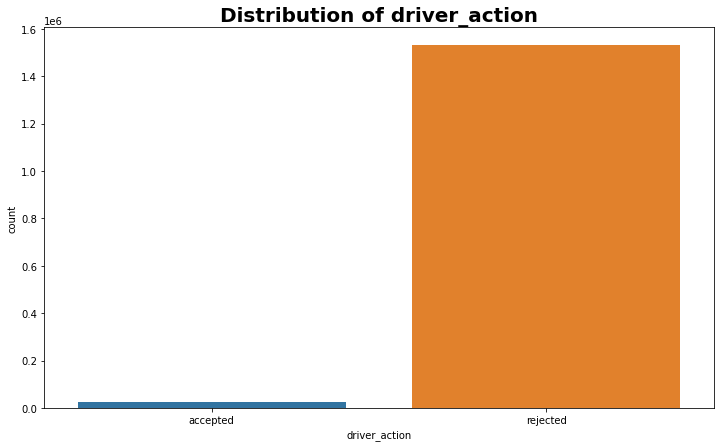

In [76]:
#plt.title(f'Driver action analysis', size=20, fontweight='bold')
plot_count(df, 'driver_action')

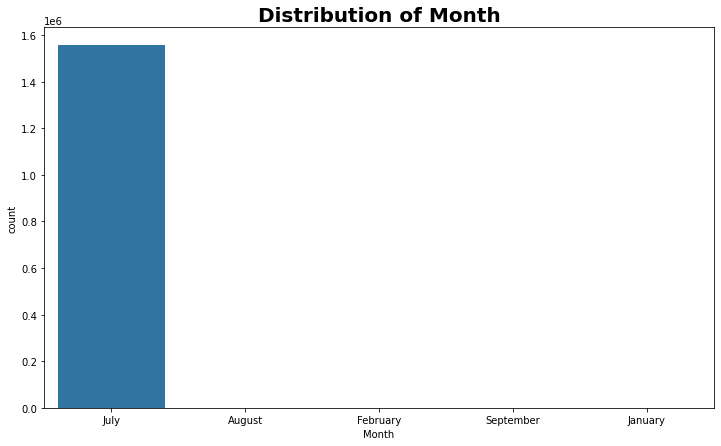

In [90]:
plot_count(df, 'Month')

In [ ]:
# Speed analysis
plot_hist(df,'Speed','blue')
sns.displot(df, x="Speed")

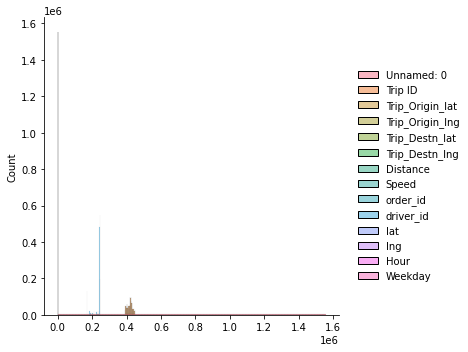

In [86]:
# Distance analysis
sns.displot(df)